# 결론

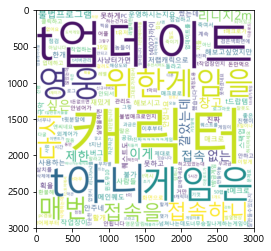

In [305]:
plt.imshow(w,interpolation='bilinear')

In [279]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [280]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=698024&m=1&p=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!--  앱 평가 리스트 시작 -->
<div class="subra" style="border-top:1px solid #ccc;">
<ul>
<li>
<div class="photo">
<img alt="Would *** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Would ***</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					아니 게임은 해보시고 운영하시는지요 ?? 메인퀘도 못하게 하는데 나가는 길목이나 메인퀫 텔포한자리에 떨어지자마자 pvp로 맞아죽고 하지를 못하는데 게임 왜 있나요 ??? 아무튼 망겜 게임삭제 별1개도 아깝
				</p>
</div>
</li>
<li>
<div class="photo">
<img alt="이* 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">이*</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					게임 진짜 재밌게 해보고싶었지만 저랩캐릭으로 사냥터가면 메크로가 나를 때려잡는데 게임 어떻게 합니까? 진짜 이대로 방치하는건가요nc?
				</p>
</div>
</li>
<li>
<d

In [278]:
review_text = lis[0].findAll('p')[1].getText()
review_text

'\r\n\t\t\t\t\t한달동안 해본 결과 다 좋은데~진짜 다 좋은데.. 사무실이라고 해야 할까요?아님 불법 메크로 라고 해야 할까요?혈맹은 가입 되어 있는데 PK하면 날아갔다 여러캐릭이 같이 똑같이 단체 사냥하면서 어지럽히네요... 그덕에 사냥터 부족도 느끼구 특히 스틸 하는데 환장하겠네요...PK해봐야 시간 낭비뿐이고...무한반복이니... 좀 개선 부탁 합니다...그리구 다이아도 그런식으로 수급 하는거 같애요..\r\n\t\t\t\t'

In [223]:
review_score=lis[0].find_all("span")[1].getText()
review_score

'1'

In [224]:
customer=lis[0].find_all('span')[0].getText()
customer

'봉*'

In [225]:
html.p.string

In [282]:
def get_data(url):#1페이지를 크롤링하는 메소드
    temp_list=[]
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'subra'})
    lis = score_result.findAll('li')
    for li in lis:
        review_text = li.find_all('p')[1].getText()
        review_score=li.find_all('span')[1].getText()
        customer=li.find_all('span')[0].getText()
        temp_list.append([customer,review_text,review_score])
    raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
    return raw_df

In [283]:
test_url9 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=698024&m=1&p=9"
get_data(test_url9)

,Customer,Review,Score
0,봉*,\r\n\t\t\t\t\t한달동안 해본 결과 다 좋은데~진짜 다 좋은데.. 사무실이...,1
1,김대*,\r\n\t\t\t\t\t거의 한달 전 갑작스런 계정 정지를 당했습니다. 이유는 아...,1
2,김소*,\r\n\t\t\t\t\t오래하려고. 생각했는데 너무심각해요 저는하루에 한시간 던전...,1
3,임현*,\r\n\t\t\t\t\t홍미노트8프로 사용중인데 몹이나 캐릭터 선택이 필드에서 되...,1
4,유동*,\r\n\t\t\t\t\t신규유저가 접근할 방법이 없음 서버케릭터 생선제한으로 신규...,1
5,김현*,\r\n\t\t\t\t\t컨텐츠도 별로없는데 거기다가 장비맛추는재미도 있어야 하는데...,1
6,구니*,\r\n\t\t\t\t\t지갑 전사들 만을 위한 시대 역행적인 게임이며 너무 불친절...,1
7,윤현*,\r\n\t\t\t\t\t업데이트하라고해서 업데이트를 진행했는데 다운로드대기중 이라...,1
8,최호*,\r\n\t\t\t\t\t리니지2m 작업 장이 활개 치고 작업 장 케릭이 좋은템 다...,1
9,오진*,\r\n\t\t\t\t\t이런 게임 하지 마세요 현질만 시키고 수천 안쓸거면 시간 ...,1


In [267]:
##############################################
url= "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=698024&m=1&p=9"
resp = requests.get(url)
html = BeautifulSoup(resp.content, 'html.parser')
score_result = html.find('div', {'class': 'subra'})
lis = score_result.findAll('li')
for i in range(0,10):
    review_text = lis[i].find_all('p')[1].getText()
    review_score=lis[i].find_all('span')[1].getText()
    customer=lis[i].find_all('span')[0].getText()
    temp_list.append([customer,review_text,review_score])
    raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
review_text = lis[9].find_all('p')[1].getText()
review_text

'\r\n\t\t\t\t\t이런 게임 하지 마세요 현질만 시키고 수천 안쓸거면 시간 낭비입니다. 무과금으로 뭐 할거 없고 득할확률 제로에 가깝습니다. 언제까지 유저를 개돼지로만 보고 게임을 만들지 이건 아닌데 참 아쉽네요 절대로 시간 남아 돌고 돈많아 쓸곳 없는 사람 말고는 감당이 안되는 게임 입니다\r\n\t\t\t\t'

In [235]:
test_url10 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=82079&m=1&p=10"
def get_data(url):#1페이지를 크롤링하는 메소드
    temp_list=[]
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'subra'})
    lis = score_result.findAll('li')
    for i in range(0,10):
        
        review_text = lis[i].find_all('p')[1].getText()
        review_score=lis[i].find_all('span')[1].getText()
        customer=lis[i].find_all('span')[0].getText()
        temp_list.append([customer,review_text,review_score])
        raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
    return raw_df

In [236]:
f=get_data(test_url10)
f

,Customer,Review,Score
0,송지*,\r\n\t\t\t\t\t편리성 제로 신경써서 뭔가잔뜩벌려만 놓은 느낌.그냥 최악 ...,1
1,최아**,\r\n\t\t\t\t\t7일간 뭐시기 이벤트인가뭔가 공인인증서 인증 하고니면 그 ...,1
2,군고**,\r\n\t\t\t\t\t첫 계좌이체한다고 본인인증하라는데 인증하고 공인인증서도 인...,1
3,윈드**,\r\n\t\t\t\t\t공인인증 로그인 한다음에 지문인증 등록하려고해도 계속 로딩...,1
4,dy s***,\r\n\t\t\t\t\t은행어플중에서 가장 쓰레기어플임 속도도 느리고 모바일 ot...,1
5,R M**,\r\n\t\t\t\t\t2월 초 부터 .. 지금까지 로그인 ... 저 말고도 동일...,1
6,lail***,\r\n\t\t\t\t\t팝업떠서 7일간보지않기 아니면 닫기 터치하면 없어져야하는데...,1
7,Gyeo***,\r\n\t\t\t\t\t아니 왜 자꾸 로그인해도 흰화면만뜨고 아무것도 안눌러지나요...,1
8,Sunmi J***,"\r\n\t\t\t\t\t하나원큐서비스 자산관리 팝업 눌러지지도않고, 로그인도 안되...",1
9,김민*,\r\n\t\t\t\t\t앱이 오류가 나면 왜 고치질 않나요? 담당자 뭐합니까? 몇...,1


In [284]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=81892&m=0&p="
#100페이지를 크롤링하는 함수
def Mycrawl(page):
    for i in range(1,page):
        if(i==1):
            addr=test_url+str(i)
            xdata=get_data(addr) #1페이지
            ydata=get_data(addr+str(i+1))#2페이지
            zdata=pd.concat([xdata,ydata],ignore_index=True)
        else:
            kdata=get_data(addr+str(i+1))#3페이지부터 시작!
            zdata=pd.concat([zdata,kdata],ignore_index=True)
    return zdata

In [285]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=698024&m=1&p="
df=Mycrawl(9)

In [286]:
print(df.shape)

(90, 3)


In [287]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [294]:
from wordcloud import WordCloud 
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


<Figure size 864x864 with 0 Axes>

In [295]:
alpha=str(df['Review'])

In [302]:

w = WordCloud(
    font_path = 'malgun.ttf',
    width = 3000,
    height = 3000,
    stopwords=['t',"게임","때문에","접속이",'t','r','/',"모바일","t게임","하지","어떻게"],
    background_color="white"
)
w=w.generate(alpha)

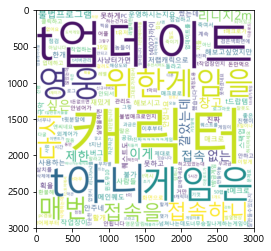

In [303]:
plt.imshow(w,interpolation='bilinear')